In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

np.random.seed(20241128)


# 5
## 5.1

In [7]:
# Number of samples
n_samples = 10000
# Step 1: Generate uniform samples
unif_samples = np.random.uniform(0, 1, n_samples)


def geometric_pmf(p, k):
    """计算几何分布的PMF"""
    return (1 - p) ** k - 1 * p


def geometric_random(p):
    """根据几何分布生成随机数"""
    # 初始化概率分布和累积概率
    k = 1
    p_k = geometric_pmf(p, k)
    cumulative_prob = p_k  # 累积概率
    probabilities = [p_k]

    # 计算累积概率，直到累积概率接近1
    while cumulative_prob < 1:
        k += 1
        p_k = geometric_pmf(p, k)
        cumulative_prob += p_k
        probabilities.append(p_k)

    # 生成一个均匀分布的随机数
    u = np.random.random()

    # 根据随机数u确定属于哪个区间
    cumulative = 0
    for i, prob in enumerate(probabilities):
        cumulative += prob
        if u <= cumulative:
            return i  # 返回对应的k值


<class 'numpy.ndarray'>


# 6.



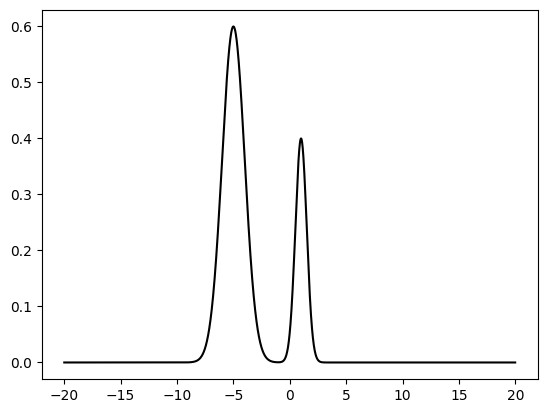

In [2]:
def fs(x):
    return 0.6 * np.exp(-(x + 5) ** 2 / 2) + 0.4 * np.exp(-(x - 1) ** 2 / 0.5)


x = np.arange(-20, 20, 0.01)

plt.plot(x, fs(x), color='black')

In [3]:
# Use the quad function in the scipy library to calculate the integral

# 定义积分区间
a, b = -1000, 1000  # 例如，区间是 [-10, 10]

# 计算积分
area, error = quad(fs, a, b)

print(f"计算得到的面积是: {area}")
print(f"误差估计是: {error}")


计算得到的面积是: 2.0053026197048
误差估计是: 4.4905022172620224e-11


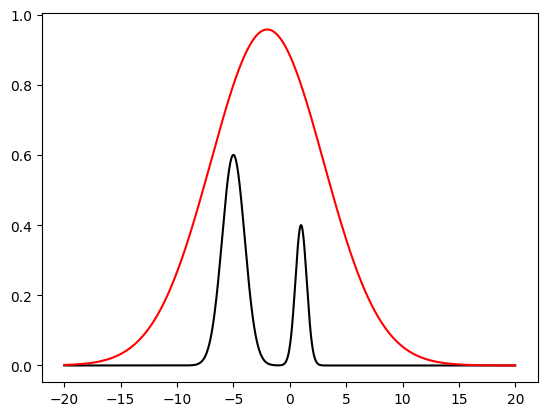

In [4]:
# Try to use a normal distribution to be the proposal distribution
def gs(x, mu, sigma, c):
    return c / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))


plt.plot(x, fs(x), color='black')
plt.plot(x, gs(x, -2, 5, 12), color='red')

(array([1.92405961e-04, 0.00000000e+00, 9.62029805e-05, 9.62029805e-05,
        4.81014903e-04, 4.81014903e-04, 5.77217883e-04, 9.62029805e-04,
        1.25063875e-03, 2.02026259e-03, 2.02026259e-03, 3.46330730e-03,
        5.77217883e-03, 7.31142652e-03, 1.26987934e-02, 1.36608232e-02,
        1.77975514e-02, 2.84760822e-02, 3.70381475e-02, 4.49267919e-02,
        5.56053227e-02, 7.53269338e-02, 8.96611779e-02, 1.04091625e-01,
        1.23428424e-01, 1.44977892e-01, 1.64988112e-01, 1.85575549e-01,
        2.07125017e-01, 2.35985911e-01, 2.48588502e-01, 2.56669552e-01,
        2.83510184e-01, 2.91495031e-01, 2.98133037e-01, 3.04867245e-01,
        2.97074804e-01, 2.89186159e-01, 2.77160787e-01, 2.61383498e-01,
        2.37140347e-01, 2.25980801e-01, 1.99621185e-01, 1.72876756e-01,
        1.63929879e-01, 1.32279098e-01, 1.14866359e-01, 9.62991835e-02,
        7.41724980e-02, 6.61876506e-02, 5.06989707e-02, 3.92508161e-02,
        2.80912703e-02, 2.36659332e-02, 1.83747693e-02, 1.452665

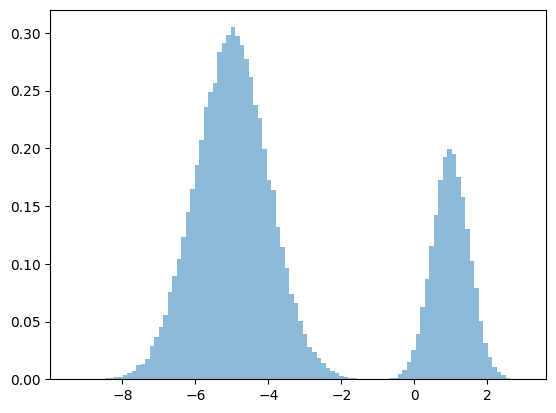

In [5]:
# Apply the rejection sampling technique
n_samples = 500000
# Step I: sample from the proposal distribution
x_samples = np.random.normal(loc=-2, scale=5, size=n_samples)

# Step II: sample from the uniform distribution
u_samples = np.random.uniform(0, 1, n_samples)

# Step III: compare ui with f(xi)/cg(xi) and decide whether to reject or not
accept_samples = x_samples[u_samples <= fs(x_samples) / gs(x_samples, -2, 5, 12)]
plt.hist(accept_samples, bins=100, alpha=0.5, label='Simulated Samples from f*', density=True)


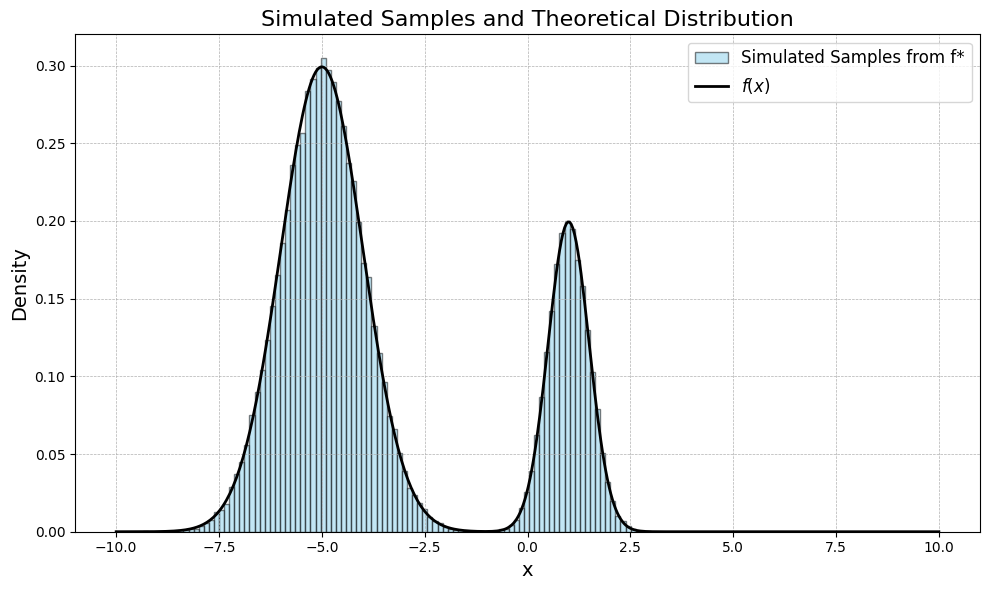

In [6]:
# 创建画布
plt.figure(figsize=(10, 6))

# 绘制直方图
plt.hist(accept_samples, bins=100, alpha=0.5, label='Simulated Samples from f*', density=True, color='skyblue',
         edgecolor='black')

# 绘制拟合函数
x = np.linspace(-10, 10, 500)  # 根据需要调整范围
plt.plot(x, fs(x) / 2.0053, color='black', linewidth=2, label=r'$f(x)$')

# 添加标题和标签
plt.title('Simulated Samples and Theoretical Distribution', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)

# 添加图例
plt.legend(loc='upper right', fontsize=12)

# 设置网格
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 显示图像
plt.tight_layout()
plt.show()
